# Grupo 2 : Mariu Andrade & Mauricio Rumbea

Modulo 3

## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

c:\Users\mrumb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataframe - Red Socal Tw - LaHistoriaEC

In [2]:
# cargar el dataframe
df = pd.read_csv("lahistoriaec.csv")
df.head()

,contributors,coordinates,created_at,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,...,retweeted_status.place.bounding_box.coordinates,retweeted_status.place.bounding_box.type,retweeted_status.place.contained_within,retweeted_status.place.country,retweeted_status.place.country_code,retweeted_status.place.full_name,retweeted_status.place.id,retweeted_status.place.name,retweeted_status.place.place_type,retweeted_status.place.url
0,NaN,NaN,Sat Nov 21 14:18:24 +0000 2020,16,False,NaN,1330153595493343241,1330153595493343241,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Sat Nov 21 05:07:50 +0000 2020,53,False,NaN,1330015039873560577,1330015039873560577,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Sat Nov 21 04:41:09 +0000 2020,290,False,NaN,1330008325455556609,1330008325455556609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Sat Nov 21 04:25:33 +0000 2020,85,False,NaN,1330004396420296704,1330004396420296704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Sat Nov 21 02:37:17 +0000 2020,18,False,NaN,1329977153572794369,1329977153572794369,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 223 entries, contributors to retweeted_status.place.url
dtypes: bool(18), float64(74), int64(13), object(118)
memory usage: 647.8+ KB


In [8]:
#mostrar todas las columnas
pd.set_option('display.max_rows', None)

In [9]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'favorite_count',
       'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id',
       ...
       'retweeted_status.place.bounding_box.coordinates',
       'retweeted_status.place.bounding_box.type',
       'retweeted_status.place.contained_within',
       'retweeted_status.place.country', 'retweeted_status.place.country_code',
       'retweeted_status.place.full_name', 'retweeted_status.place.id',
       'retweeted_status.place.name', 'retweeted_status.place.place_type',
       'retweeted_status.place.url'],
      dtype='object', length=223)

### Subset Dataframe

In [10]:
dfc = df[['user.id', 'created_at','id','text','favorite_count','retweet_count']]

In [11]:
dfc.dtypes

user.id            int64
created_at        object
id                 int64
text              object
favorite_count     int64
retweet_count      int64
dtype: object

In [12]:
dfc = dfc.copy()
# convertir object a entero
#dfc['favorite_count'] = dfc['favorite_count'].replace('False', 0).fillna(0).astype(int)

## Análisis Exploratorio

In [13]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user.id         400 non-null    int64 
 1   created_at      400 non-null    object
 2   id              400 non-null    int64 
 3   text            400 non-null    object
 4   favorite_count  400 non-null    int64 
 5   retweet_count   400 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 18.9+ KB


## Modelo ML - Análisis de Sentimiento

In [14]:
def analizar_sentimientos(textos):
   """
   Realiza análisis de sentimientos en español.


   Args:
       textos (list of str): Lista de textos para analizar.


   Returns:
       list of dict: Lista de resultados con las etiquetas y puntuaciones.
   """
   # Cargar el pipeline de análisis de sentimientos con un modelo multilingüe BERT
   analizador_sentimientos = pipeline(
       "sentiment-analysis",
       model="nlptown/bert-base-multilingual-uncased-sentiment"
   )


   # Analizar cada texto
   resultados = analizador_sentimientos(textos)


   return resultados

In [15]:
textos = [
   "la atencion en este sitio es mala ya quiero volver a casa",
   "eficiente y comodo",
   "Cálida bienvenida, personal eficiente",
   "este sitio es muy bueno y la atencion es de lo mejor",
   "la atencion en este sitio es mala ya quiero volver a casa",
   "espero nunca jamas volver a un lugar tan despreciable y triste como este",
   "Me encanta este producto, es realmente fantástico.",
   "Estoy muy decepcionado con el servicio.",
   "La película fue bastante aburrida.",
   "¡Qué experiencia tan increíble!",
   "No volveré a comprar aquí, pésima atención al cliente."
]

In [16]:
# Realizar análisis de sentimientos
resultados = analizar_sentimientos(textos)

Device set to use cpu


In [17]:
resultados

[{'label': '1 star', 'score': 0.5523918867111206},
 {'label': '5 stars', 'score': 0.5462833046913147},
 {'label': '4 stars', 'score': 0.47046583890914917},
 {'label': '5 stars', 'score': 0.6677963733673096},
 {'label': '1 star', 'score': 0.5523918867111206},
 {'label': '5 stars', 'score': 0.4677714407444},
 {'label': '5 stars', 'score': 0.9002560377120972},
 {'label': '1 star', 'score': 0.5988107323646545},
 {'label': '2 stars', 'score': 0.5871408581733704},
 {'label': '5 stars', 'score': 0.9215057492256165},
 {'label': '1 star', 'score': 0.9018054008483887}]

In [18]:
# ajuste de texto para correr la funcion
opinions = [str(text) for text in dfc['text'].values]

In [19]:
# modelo ml con el dataframe
results = analizar_sentimientos(opinions)

Device set to use cpu


In [20]:
df_tw = pd.DataFrame(results)

In [21]:
df_tw

,label,score
0,1 star,0.488097
1,1 star,0.691466
2,5 stars,0.479085
3,1 star,0.497309
4,5 stars,0.332761
5,1 star,0.268803
6,1 star,0.610893
7,1 star,0.603480
8,1 star,0.623087
9,5 stars,0.462221


In [22]:
opinionestw = df_tw.groupby('label').count()

## Histplot de Comentarios Calificados

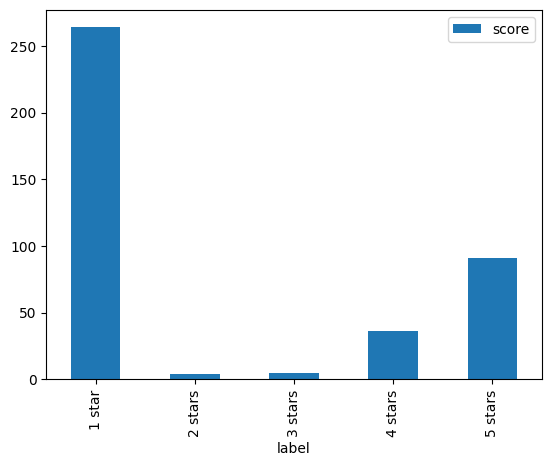

In [23]:
histplot = opinionestw.plot(kind='bar')
plt.show()

In [24]:
df_tw['label'].value_counts(normalize=True)

label
1 star     0.6600
5 stars    0.2275
4 stars    0.0900
3 stars    0.0125
2 stars    0.0100
Name: proportion, dtype: float64

In [25]:
df_tw['label'].value_counts()

label
1 star     264
5 stars     91
4 stars     36
3 stars      5
2 stars      4
Name: count, dtype: int64

In [26]:
df_combined = pd.concat([dfc, df_tw], axis=1)

## Matriz de Alcance de Comentarios

In [27]:
df_combined.groupby('label')[['favorite_count', 'retweet_count']].sum()

,favorite_count,retweet_count
label,,
1 star,23303,14317
2 stars,492,310
3 stars,3808,3223
4 stars,2947,1217
5 stars,12636,4930


# Recomendaciones:

Agregar comentarios